# Endangered Species Identification Using Camera Trap Images

Created by: Preksha Shah
---
### Aim:
The aim of this assignment is to apply digital image and video processing techniques to analyze and manipulate images and video frames. The focus is on:
1. Loading and processing images.
2. Thresholding, contrast stretching, filtering, and morphological operations on images.
3. Performing feature detection including point, line, and edge detection.
4. Extracting and analyzing frames from a video, followed by extracting features like the number of components, area, and component density.

### Procedure:
1. **Import Libraries:** Essential libraries for image and video processing (`cv2`, `numpy`, `matplotlib`, `skimage`, and `scipy`) were imported.
2. **Input Images:**
   - Users upload images for processing (two images in this case).
   - Both images are loaded and displayed for initial visualization.
3. **Thresholding and Component Analysis:**
   - Thresholding is applied to an image to convert it into a binary format.
   - Connected component analysis is done to count the number of connected components and calculate the total area.
4. **Contrast Stretching:**
   - A contrast stretching technique is applied to improve the intensity range of an image.
5. **Median Filtering:**
   - A median filter is applied to smooth the image, removing noise.
6. **Edge Detection:**
   - Canny edge detection is used to identify edges in an image.
7. **Morphological Operations:**
   - Erosion followed by dilation is applied for morphological analysis.
8. **Video Frame Extraction:**
   - Frames are extracted from a video at regular intervals.
   - The frames are processed by converting them into grayscale, applying thresholding, and performing connected component analysis.
9. **Data Collection and Plotting:**
   - Data like the number of components, total area, and average component size are stored and plotted for analysis.
10. **Frame Visualization:**
   - A processed frame from the video is displayed with bounding boxes around components.

----


In [ ]:
# Introduction to Digital Image and Video Processing
# Importing the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import measure, filters
from scipy.ndimage import label

In [2]:
# Function to display multiple images with titles
def show_images(images, titles, cmap="gray"):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis("off")
    plt.show()

# SECTION 1: INPUT IMAGES

Upload your image files:


Saving 1.jpeg to 1 (4).jpeg
Saving 2.jpeg to 2 (4).jpeg
Saving 3.jpeg to 3 (4).jpeg
Saving 4.jpeg to 4 (4).jpeg
Saving 5.jpeg to 5 (4).jpeg


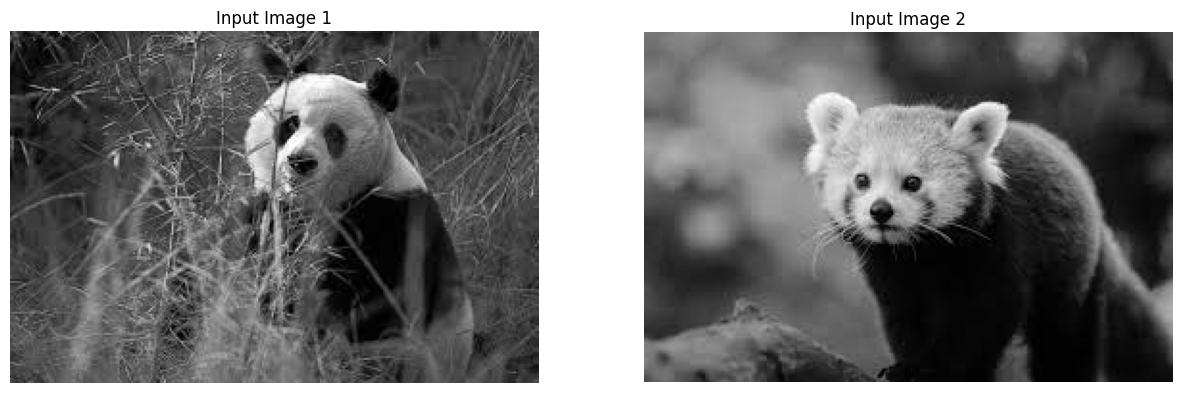

In [28]:
# Prompt user to upload images
print("Upload your image files:")
uploaded_files = files.upload()  # User uploads files via Colab's UI

# Load the uploaded images
uploaded_image_paths = list(uploaded_files.keys())  # Extract file paths from the upload dictionary

if len(uploaded_image_paths) >= 2:
    # Read two images for processing
    image1 = cv2.imread(uploaded_image_paths[0], cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(uploaded_image_paths[1], cv2.IMREAD_GRAYSCALE)
else:
    raise ValueError("Please upload at least two images for processing.")

# Display the uploaded images
show_images([image1, image2], ["Input Image 1", "Input Image 2"])

# SECTION 2: ADJUST IMAGE THRESHOLD AND ANALYZE COMPONENT AREA

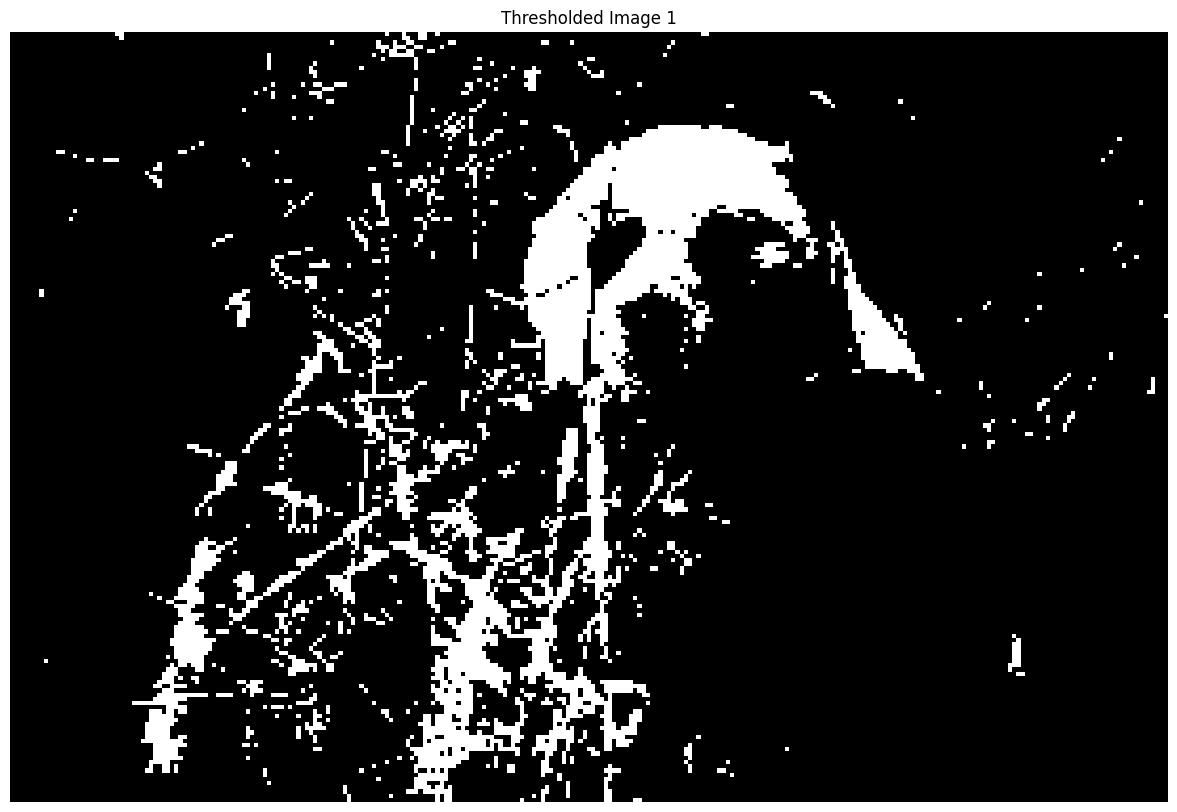

Image 1: Number of Components: 397, Total Area: 5841


In [29]:
def threshold_and_analyze(image, threshold_value):
    # Apply threshold
    _, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    # Analyze connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
    total_area = np.sum(stats[1:, cv2.CC_STAT_AREA])  # Exclude background area
    return binary_image, num_labels - 1, total_area

# Apply thresholding on Image 1
threshold_value = 127  # You can change this value based on analysis
binary_image1, num_components1, total_area1 = threshold_and_analyze(image1, threshold_value)

# Display the thresholded image and results
show_images([binary_image1], ["Thresholded Image 1"])
print(f"Image 1: Number of Components: {num_components1}, Total Area: {total_area1}")


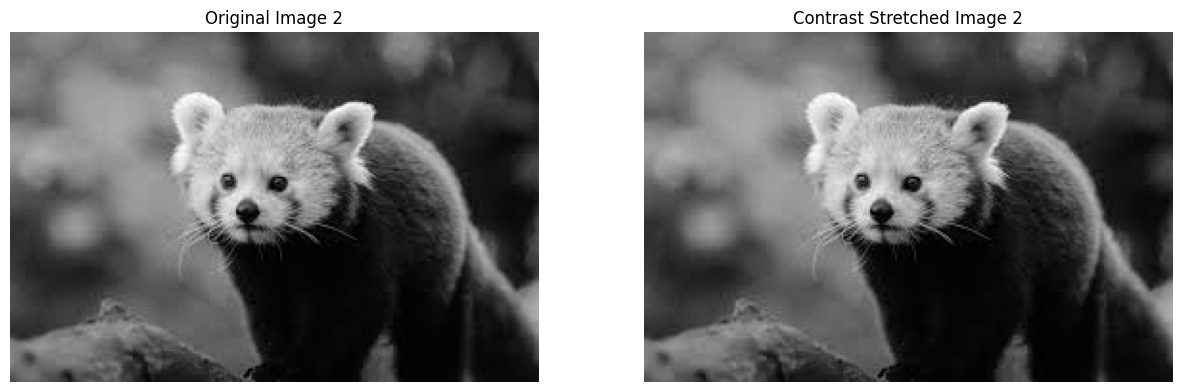

In [30]:
# SECTION 3: IMPLEMENT CONTRAST STRETCHING
def contrast_stretch(image):
    # Stretch pixel intensities to full range (0-255)
    min_val, max_val = np.min(image), np.max(image)
    stretched_image = ((image - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    return stretched_image

# Apply contrast stretching on Image 2
stretched_image2 = contrast_stretch(image2)

# Display the contrast stretched image
show_images([image2, stretched_image2], ["Original Image 2", "Contrast Stretched Image 2"])

# SECTION 4: APPLY NON-LINEAR SPATIAL FILTERING

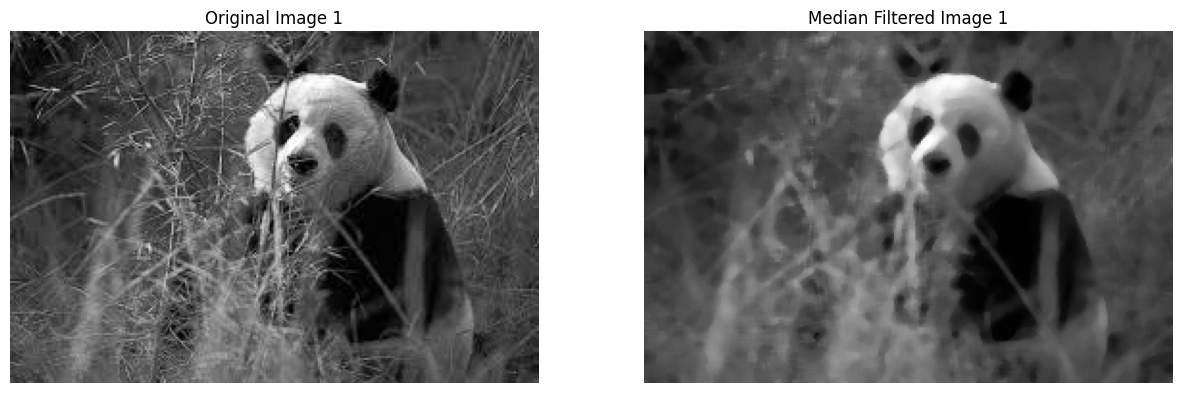

In [31]:
def apply_median_filter(image, kernel_size=5):
    # Apply a median filter
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image

# Apply median filter on Image 1
filtered_image1 = apply_median_filter(image1)

# Display the filtered image
show_images([image1, filtered_image1], ["Original Image 1", "Median Filtered Image 1"])


# SECTION 5: FEATURE DETECTION - POINT, LINE, AND EDGE DETECTION

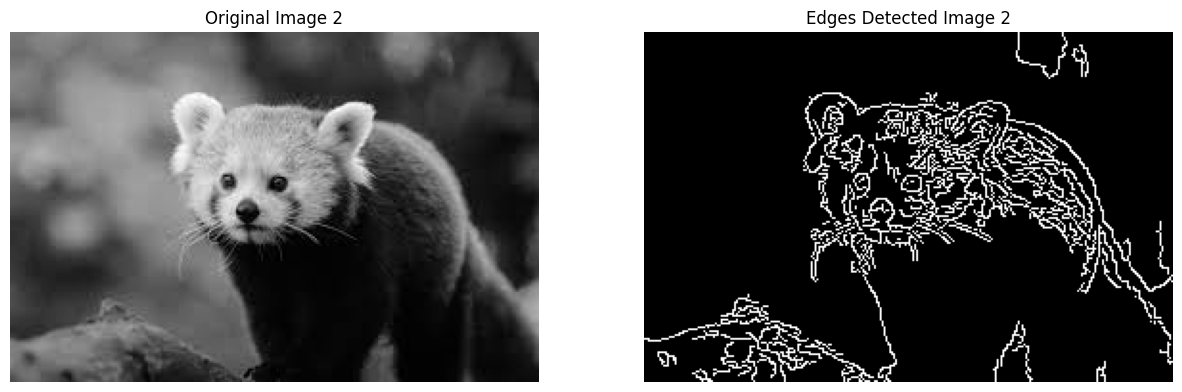

In [32]:
def detect_edges(image):
    # Apply Canny Edge Detection
    edges = cv2.Canny(image, 50, 150)
    return edges

# Detect edges in Image 2
edges_image2 = detect_edges(image2)

# Display the edges detected
show_images([image2, edges_image2], ["Original Image 2", "Edges Detected Image 2"])


# SECTION 6: FIND LABELED COMPONENTS, AREA, AND DENSITY


In [33]:
def find_labeled_components(image):
    # Apply threshold to get binary image
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    # Find connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
    areas = stats[1:, cv2.CC_STAT_AREA]  # Exclude background area
    integrated_density = np.sum(areas)
    return num_labels - 1, areas, integrated_density

# Analyze labeled components in Image 1
num_labels1, areas1, integrated_density1 = find_labeled_components(image1)
print(f"Image 1: Labeled Components: {num_labels1}, Areas: {areas1}, Integrated Density: {integrated_density1}")


Image 1: Labeled Components: 397, Areas: [   3    1   29    4    1    2    1    1    2    2    1    2    4    1
    2    1    5    1    1    1    7    2    1    2    1   15    3    1
    1    1    1    1    1   12    5    1    1    1    1    2    1   12
    1    8    2    4    2    1    1    1   15    1    1    1    3    2
    1    1    1    1    6    6 3408    4    1    1    1    1    1    5
    2    1    2    1    2    1    1   14    1    1    1    2    4    3
    2    2    1    1    1    6    2    2    2    1    1    2    1   11
    3    1   16    7    1    3    1    3    4    2    1    1    1    4
    2    1   10    3    4    2    1    2  223    1    5    1    1    3
    2    2    4   34    2   14    3    2    2    1    6    1    2    2
    1    4    1    1    9    1    1    2   26    1    3    1    1    4
    2   10    1    2    1    2  221    1    1    1    1    1   66    1
    1    1    1    2    1    7    1    1    1    2    2    1    2    2
    1    1   13    3    1    3    2 

Your inference for Image 1 highlights the results of connected component analysis:

1. **Labeled Components**: The analysis identified **397 connected components** within the image.  
2. **Areas**: The areas of these components vary, as indicated by the distribution provided in the array. Notably:
   - Most components have small areas (e.g., 1, 2, 3), but a few have much larger areas, such as **3408**, **223**, and **221**. These likely correspond to significant structures or features in the image.
3. **Integrated Density**: The **sum of pixel intensities for all components** is **5841**. This value provides a measure of the total "brightness" or "intensity" present in the labeled components.

This information can be useful for understanding the distribution and characteristics of features in the analyzed image. If needed, further insights (e.g., visualizing specific components, or filtering based on area or intensity) can be derived to refine your analysis. Let me know if you'd like to explore additional processing or visualization steps!# SECTION 7: MORPHOLOGY ANALYSIS

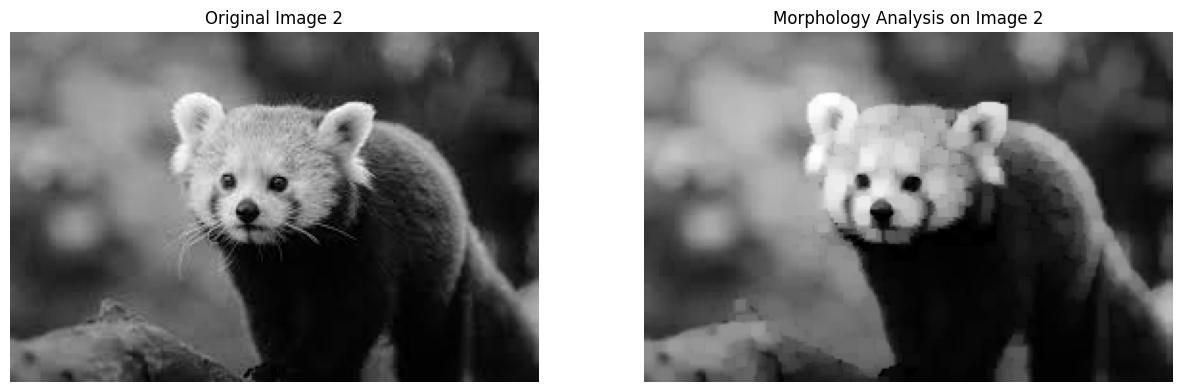

In [34]:
def morphology_analysis(image):
    # Apply morphological operations: Erosion followed by Dilation (Opening)
    kernel = np.ones((5, 5), np.uint8)
    opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    return opened_image

# Perform morphology analysis on Image 2
morphed_image2 = morphology_analysis(image2)

# Display the morphology results
show_images([image2, morphed_image2], ["Original Image 2", "Morphology Analysis on Image 2"])


# SECTION 8: VIDEO FRAME EXTRACTION (Optional)

In [36]:
def extract_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))  # Convert to grayscale
    cap.release()
    return frames
video_path='/content/What Animals are Endangered_ _ Endangered Species Explained for Kids.mp4'

Sample Analysis Results (First 5 Frames):
[{'frame': 0, 'num_components': 475, 'total_area': 75724, 'avg_size': 159.41894736842104}, {'frame': 30, 'num_components': 391, 'total_area': 63793, 'avg_size': 163.153452685422}, {'frame': 60, 'num_components': 16, 'total_area': 26484, 'avg_size': 1655.25}, {'frame': 90, 'num_components': 294, 'total_area': 21783, 'avg_size': 74.09183673469387}, {'frame': 120, 'num_components': 308, 'total_area': 43447, 'avg_size': 141.0616883116883}]


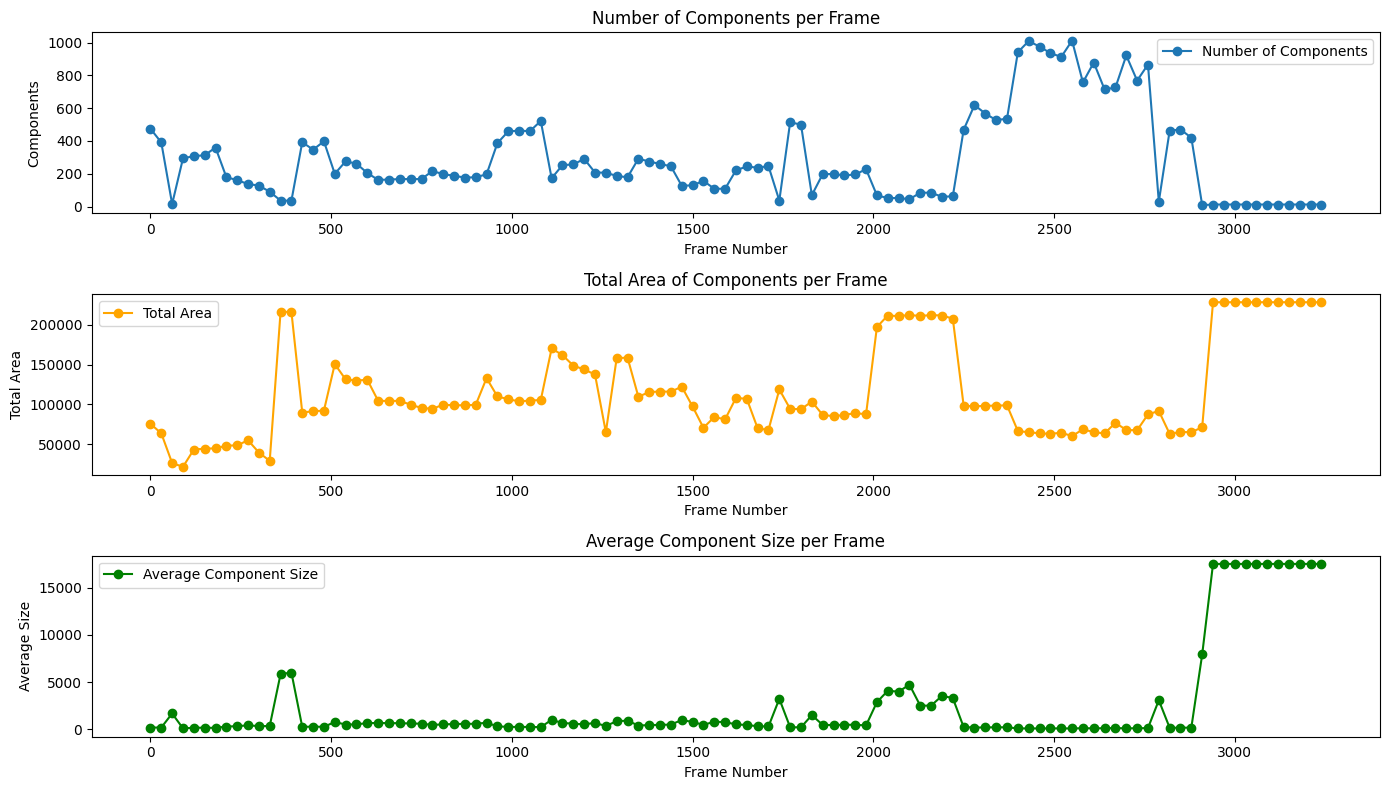

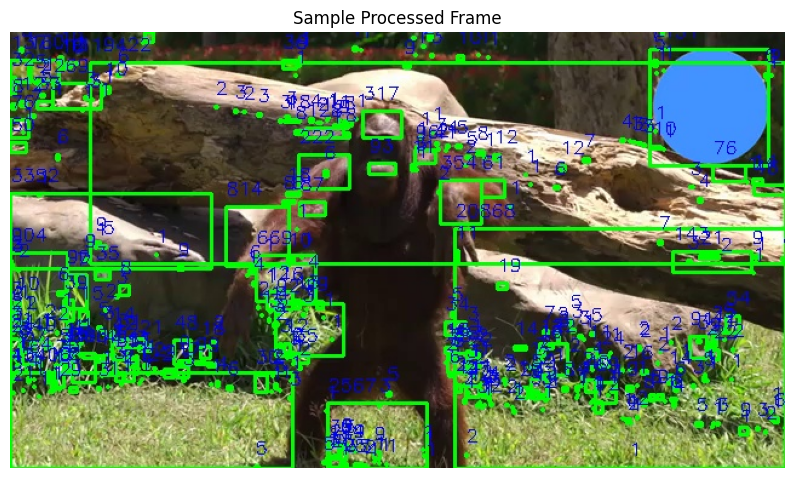

In [37]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to display an image
def show_image(image, title="Image"):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to process a single frame
def process_frame(frame, frame_number):
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding
    _, binary_frame = cv2.threshold(gray_frame, 127, 255, cv2.THRESH_BINARY)

    # Connected components analysis
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_frame)

    # Calculate total area and average size of components
    total_area = np.sum(stats[1:, cv2.CC_STAT_AREA])  # Ignore background (index 0)
    avg_size = total_area / (num_labels - 1) if num_labels > 1 else 0

    # Draw bounding boxes around labeled components on the original frame
    processed_frame = frame.copy()
    for i in range(1, num_labels):  # Skip background (label 0)
        x, y, w, h, area = stats[i]
        cv2.rectangle(processed_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(processed_frame, f"{area}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Return results
    return processed_frame, num_labels - 1, total_area, avg_size

# Function to extract and process frames from video
def analyze_video(video_path, output_folder, frame_interval=30):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Open the video file
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    results = []  # To store analysis results

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Process every `frame_interval`th frame
        if frame_count % frame_interval == 0:
            processed_frame, num_components, total_area, avg_size = process_frame(frame, frame_count)

            # Save the processed frame to the output folder
            output_frame_path = os.path.join(output_folder, f"frame_{frame_count}.jpg")
            cv2.imwrite(output_frame_path, processed_frame)

            # Append results
            results.append({
                "frame": frame_count,
                "num_components": num_components,
                "total_area": total_area,
                "avg_size": avg_size
            })

        frame_count += 1

    cap.release()
    return results

# Function to plot results
def plot_video_analysis(results):
    frames = [r['frame'] for r in results]
    num_components = [r['num_components'] for r in results]
    total_areas = [r['total_area'] for r in results]
    avg_sizes = [r['avg_size'] for r in results]

    plt.figure(figsize=(14, 8))

    # Plot number of components
    plt.subplot(3, 1, 1)
    plt.plot(frames, num_components, marker='o', label="Number of Components")
    plt.title("Number of Components per Frame")
    plt.xlabel("Frame Number")
    plt.ylabel("Components")
    plt.legend()

    # Plot total area
    plt.subplot(3, 1, 2)
    plt.plot(frames, total_areas, marker='o', color='orange', label="Total Area")
    plt.title("Total Area of Components per Frame")
    plt.xlabel("Frame Number")
    plt.ylabel("Total Area")
    plt.legend()

    # Plot average size
    plt.subplot(3, 1, 3)
    plt.plot(frames, avg_sizes, marker='o', color='green', label="Average Component Size")
    plt.title("Average Component Size per Frame")
    plt.xlabel("Frame Number")
    plt.ylabel("Average Size")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main Program
# Upload a video file manually in Kaggle/Colab before running this
video_path = "/content/What Animals are Endangered_ _ Endangered Species Explained for Kids.mp4"  # Replace with your video path
output_folder = "/kaggle/working/processed_frames"

# Analyze video
results = analyze_video(video_path, output_folder)

# Display results for the first few frames
print("Sample Analysis Results (First 5 Frames):")
print(results[:5])

# Plot analysis
plot_video_analysis(results)

# Display a processed frame for visualization
sample_frame_path = os.path.join(output_folder, "frame_0.jpg")
sample_frame = cv2.imread(sample_frame_path)
show_image(cv2.cvtColor(sample_frame, cv2.COLOR_BGR2RGB), "Sample Processed Frame")


---

### Concepts Used:
1. **Image Thresholding:** Converts an image to binary (black and white), allowing easier analysis.
2. **Connected Component Analysis:** Helps identify distinct regions or objects within the image.
3. **Contrast Stretching:** Enhances the contrast in an image, stretching pixel intensities to span the full range.
4. **Median Filtering:** A non-linear filter that removes noise while preserving edges.
5. **Edge Detection (Canny Edge Detection):** Detects edges within an image, useful for feature extraction.
6. **Morphological Operations:** Techniques like dilation and erosion are used to modify the structure of objects in an image.
7. **Video Frame Analysis:** Extracting and processing individual video frames to analyze features over time.

### Key Achievements:
- Successfully processed and displayed multiple images with different operations.
- Applied and visualized thresholding, contrast stretching, median filtering, edge detection, and morphological operations.
- Performed connected component analysis on both images and video frames, extracting useful features such as area and number of components.
- Extracted frames from a video and analyzed them for specific features, such as the number of components and total area.
- Plotted the results of video frame analysis to visualize trends across frames.

### Conclusion:
This assignment provided hands-on experience with various image and video processing techniques, including thresholding, filtering, edge detection, and connected component analysis. By applying these techniques to both images and video frames, we gained insights into the structure and features within the content. The results, including the number of components and total area in both images and video frames, were effectively visualized and analyzed. This work can be expanded to more complex video processing tasks, such as object tracking or motion analysis, and can serve as a foundation for more advanced digital image and video processing applications.

---
---